# Train/Test Split

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# predict Species
iris_df = pd.read_csv('C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Iris.csv')

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 150 non-null    int64  
 1   Sepal Length (cm)  150 non-null    float64
 2   Sepal Width (cm)   150 non-null    float64
 3   Petal Length (cm)  150 non-null    float64
 4   Petal Width (cm)   150 non-null    float64
 5   Species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Step 1: separate training data from prediction target
# =====================================================
# (also get rid of Id-column)
# Naming convention: training data = X; prediction target = y
X = iris_df.drop(columns = ["Species"])
y = iris_df["Species"]

In [5]:
# Step 2: Apply Train/Test Split
# ==============================
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# function will shuffle the dataset before separation (good)
# test-size: 20-30% of the data (rule of thumb)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [6]:
X_train

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
98,99,5.1,2.5,3.0,1.1
68,69,6.2,2.2,4.5,1.5
19,20,5.1,3.8,1.5,0.3
143,144,6.8,3.2,5.9,2.3
99,100,5.7,2.8,4.1,1.3
...,...,...,...,...,...
37,38,4.9,3.1,1.5,0.1
79,80,5.7,2.6,3.5,1.0
33,34,5.5,4.2,1.4,0.2
94,95,5.6,2.7,4.2,1.3


# 1. Quick Sanity Checks for your Dataset

Possible Problems
- Duplicated rows
- Numbers are saved as strings



## 1.1 Check for duplicated values

In [7]:
# Netflix-dataset
netflix_df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Netflix.csv")
netflix_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [8]:
print(netflix_df.duplicated().sum())

0


In [9]:
# In case of dupliacted rows: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
netflix_df.drop_duplicates(inplace = True)

## 1.2 Check for wrong datatypes
Pandas datatypes (64 refers to the amount of memory that is used to save a value)
- int64 (= int in Python)
- float64 (= float in Python)
- object (= string in Python)
- datetime64 (= datetime)



In [10]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [11]:
# As an example: convert the runtime column to type string
netflix_df["runtime"] = netflix_df["runtime"].astype("object")

# Look at the dtypes of the dataset
print(netflix_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   object 
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [12]:
# As int is actually ok, we change it back
netflix_df["runtime"] = netflix_df["runtime"].astype(int)

# Look at the dtypes of the dataset
print(netflix_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int32  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int32(

# 2. Remove and replace missing values (columns/rows)

## 2.1 Remove Missing Values entirely (to be avoided)

In [13]:
# Example 1: Remove rows with null values from individual columns

# Count missing values in each column
print("Initial length:", len(netflix_df), "rows")
print(netflix_df.isnull().sum())

Initial length: 5806 rows
id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64


In [14]:
# Create a new df where we remove missing values from the "description"-column
netflix_df_subset = netflix_df[netflix_df["description"].notnull()]
    
print("New length:", len(netflix_df_subset), "rows")
print(netflix_df_subset.isnull().sum())

New length: 5788 rows
id                         0
title                      0
type                       0
description                0
release_year               0
age_certification       2603
runtime                    0
genres                     0
production_countries       0
seasons                 3751
imdb_id                  434
imdb_score               510
imdb_votes               525
tmdb_popularity           89
tmdb_score               309
dtype: int64


In [15]:
# Example 2: Drop entire columns or rows
#  - source: # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

# remove all rows that contain empty values
without_rows_df = netflix_df_subset.dropna(axis=0)
print("Removed rows with missing values.")
print("New length:", len(without_rows_df), "rows")
print(without_rows_df.isnull().sum())


Removed rows with missing values.
New length: 1597 rows
id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64


In [16]:
# remove all columns that contain empty values
without_columns_df = netflix_df_subset.dropna(axis=1)
print("Removed columns with missing values:")
print(without_columns_df.isnull().sum())

Removed columns with missing values:
id                      0
title                   0
type                    0
description             0
release_year            0
runtime                 0
genres                  0
production_countries    0
dtype: int64


## 2.2 Replace missing values (better strategy)

In [17]:
# Reload Netflix-dataset
netflix_df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Netflix.csv")
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

### 2.2.1 Strategy: Replace missing values with the mean
For numeric values without outliers: replace missing values with the mean

In [18]:
netflix_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [19]:
# Changes output of the transformers to Pandas
from sklearn import set_config
set_config(transform_output="pandas")

# import the imputing function
from sklearn.impute import SimpleImputer

In [20]:
# define imputer and strategy
imputer = SimpleImputer(strategy="mean", add_indicator=True)

In [21]:
# applying fit and transform separately
imputer.fit(netflix_df[['imdb_votes']])

# need to assign the output of the imputer to 2 columns
# the original columns gets overwritten and a new column contains the indicator
netflix_df[['imdb_votes', 'missingindicator_imdb_votes']] = imputer.transform(netflix_df[['imdb_votes']])

In [22]:
netflix_df[['imdb_votes', 'missingindicator_imdb_votes']]

,imdb_votes,missingindicator_imdb_votes
0,23407.194988,1.0
1,795222.000000,0.0
2,530877.000000,0.0
3,392419.000000,0.0
4,391942.000000,0.0
...,...,...
5801,39.000000,0.0
5802,23407.194988,1.0
5803,32.000000,0.0
5804,9.000000,0.0


In [23]:
# applying fit and transform together

# Reload Netflix-dataset
netflix_df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Netflix.csv")

# apply fit and transform
netflix_df[['imdb_votes', 'missingindicator_imdb_votes']] = imputer.fit_transform(netflix_df[['imdb_votes']])

In [24]:
netflix_df[['imdb_votes', 'missingindicator_imdb_votes']]

,imdb_votes,missingindicator_imdb_votes
0,23407.194988,1.0
1,795222.000000,0.0
2,530877.000000,0.0
3,392419.000000,0.0
4,391942.000000,0.0
...,...,...
5801,39.000000,0.0
5802,23407.194988,1.0
5803,32.000000,0.0
5804,9.000000,0.0


### 2.2.2 Strategy: Replace missing values with the median
For numeric values with outliers: replace missing values with the median

In [25]:
print(netflix_df.isnull().sum())

id                                0
title                             1
type                              0
description                      18
release_year                      0
age_certification              2610
runtime                           0
genres                            0
production_countries              0
seasons                        3759
imdb_id                         444
imdb_score                      523
imdb_votes                        0
tmdb_popularity                  94
tmdb_score                      318
missingindicator_imdb_votes       0
dtype: int64


In [26]:
# Check for outliers
netflix_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,missingindicator_imdb_votes
count,5806.000000,5806.000000,2047.000000,5283.000000,5.806000e+03,5712.000000,5488.000000,5806.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039,0.092835
std,7.324883,39.474160,2.636207,1.160932,8.299053e+04,68.849177,1.171560,0.290226
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000,0.000000
25%,2015.000000,44.000000,1.000000,5.800000,6.080000e+02,3.155250,6.100000,0.000000
50%,2018.000000,84.000000,1.000000,6.600000,3.020500e+03,7.478000,6.900000,0.000000
75%,2020.000000,105.000000,2.000000,7.400000,2.020375e+04,17.775750,7.500000,0.000000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000,1.000000


In [27]:
# Column "tmdb_popularity" has a high max compared to the mean - most likely outliers
# Let's investigate a bit deeper...
netflix_check = netflix_df.sort_values(by = "tmdb_popularity", ascending=False)

In [28]:
# tmdb_popularity seems to have outliers
netflix_check.head(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,missingindicator_imdb_votes
4869,tm1191224,365 Days: This Day,MOVIE,Laura and Massimo are back and hotter than eve...,2022,NaN,111,"['romance', 'drama']",['PL'],NaN,tt12996154,2.5,10739.0,1823.374,5.6,0.0
4875,ts340376,The Marked Heart,SHOW,This new Colombian telenovela is about a man w...,2022,TV-MA,44,"['thriller', 'drama']",['CO'],2.0,tt18974572,6.3,1103.0,1455.085,6.8,0.0
64,ts25028,Wheel of Fortune,SHOW,This game show sees contestants solve word puz...,1983,TV-G,26,['family'],['US'],39.0,tt0072584,6.7,3126.0,1440.855,6.7,0.0
4988,tm810504,Yaksha: Ruthless Operations,MOVIE,"Nicknamed after a human-devouring spirit, the ...",2022,NaN,125,"['action', 'thriller', 'crime']",['KR'],NaN,tt12663250,6.2,2486.0,1275.252,6.2,0.0
247,ts21469,Grey's Anatomy,SHOW,Follows the personal and professional lives of...,2005,TV-14,49,"['drama', 'romance']",['US'],18.0,tt0413573,7.6,293618.0,1215.393,8.3,0.0
916,ts20110,Peaky Blinders,SHOW,"A gangster family epic set in 1919 Birmingham,...",2013,TV-MA,58,"['drama', 'crime', 'european']",['GB'],6.0,tt2442560,8.8,485506.0,971.727,8.6,0.0
4865,tm1064065,Black Crab,MOVIE,"In a post-apocalyptic world, six soldiers on a...",2022,NaN,114,"['war', 'action', 'drama', 'scifi', 'thriller']",['SE'],NaN,tt6708668,5.6,17101.0,944.405,6.2,0.0
4832,ts217231,Heartstopper,SHOW,Teens Charlie and Nick discover their unlikely...,2022,TV-14,28,"['drama', 'romance']",['GB'],1.0,tt10638036,8.9,28978.0,926.362,8.9,0.0
4836,tm1082564,The Adam Project,MOVIE,"After accidentally crash-landing in 2022, time...",2022,PG-13,106,"['drama', 'action', 'comedy', 'scifi']",['US'],NaN,tt2463208,6.7,156603.0,919.599,7.0,0.0
5046,tm1159163,Fistful of Vengeance,MOVIE,A revenge mission becomes a fight to save the ...,2022,R,94,"['fantasy', 'action', 'crime', 'drama']",['US'],NaN,tt14158554,4.5,5985.0,829.005,5.4,0.0


In [29]:
# define imputer and strategy
imputer = SimpleImputer(strategy="median", add_indicator=True)

# applying fit and transform together
netflix_df[['tmdb_popularity', 'missingindicator_tmdb_popularity']] = imputer.fit_transform(netflix_df[['tmdb_popularity']])

In [30]:
# check for null-values
print(netflix_df.isnull().sum())

id                                     0
title                                  1
type                                   0
description                           18
release_year                           0
age_certification                   2610
runtime                                0
genres                                 0
production_countries                   0
seasons                             3759
imdb_id                              444
imdb_score                           523
imdb_votes                             0
tmdb_popularity                        0
tmdb_score                           318
missingindicator_imdb_votes            0
missingindicator_tmdb_popularity       0
dtype: int64


### 2.2.3 Strategy: Replace missing values with the mode
For categorical values: replace missing values with the mode

In [31]:
netflix_df['age_certification'].value_counts()

age_certification
TV-MA    841
R        575
TV-14    470
PG-13    440
PG       246
TV-PG    186
G        131
TV-Y7    112
TV-Y     105
TV-G      76
NC-17     14
Name: count, dtype: int64

In [32]:
# define imputer and strategy
imputer = SimpleImputer(strategy="most_frequent", add_indicator=True)

# applying fit and transform together
netflix_df[['age_certification', 'missingindicator_age_certification']] = imputer.fit_transform(netflix_df[['age_certification']])


In [33]:
netflix_df['age_certification'].value_counts()

age_certification
TV-MA    3451
R         575
TV-14     470
PG-13     440
PG        246
TV-PG     186
G         131
TV-Y7     112
TV-Y      105
TV-G       76
NC-17      14
Name: count, dtype: int64

### 2.2.4 Column Transformer: Applying transformations to multiple columns 

In [34]:
# reload dataset
netflix_df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Netflix.csv")

In [35]:
from sklearn.compose import ColumnTransformer

imputer_mean = SimpleImputer(strategy="mean", add_indicator=True)

ct = ColumnTransformer(
    [('imputer', imputer_mean, ['imdb_votes'])],
    remainder='passthrough'
)

ct.fit_transform(netflix_df)

,imputer__imdb_votes,imputer__missingindicator_imdb_votes,remainder__id,remainder__title,remainder__type,remainder__description,remainder__release_year,remainder__age_certification,remainder__runtime,remainder__genres,remainder__production_countries,remainder__seasons,remainder__imdb_id,remainder__imdb_score,remainder__tmdb_popularity,remainder__tmdb_score
0,23407.194988,1.0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,795222.000000,0.0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,27.612,8.2
2,530877.000000,0.0,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,18.216,7.8
3,392419.000000,0.0,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,17.505,7.8
4,391942.000000,0.0,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,39.000000,0.0,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,0.966,NaN
5802,23407.194988,1.0,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,1.036,8.5
5803,32.000000,0.0,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,0.709,NaN
5804,9.000000,0.0,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,2.186,NaN


### 2.2.5 Exercise

In [1]:
# a) Define train-test split for Netflix Dataset
#       - prediction-target = imdb_score
# reload dataset
netflix_df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Netflix.csv")
x = netflix.df.drop(columns = ["imdb_score"])
y = netfix_df[" "]
# This got skipped in class cuz it didnt fit to our datset

NameError: name 'pd' is not defined

In [37]:
# b) Define transformations for selected columns with SimpleImputer and column transformer
#       - imdb_votes --> mean
#       - tmdb_popularity --> median/most frequent
#       - age_certification --> mode
from sklearn.compose import ColumnTransformer

imputer_mean = SimpleImputer(strategy="mean", add_indicator=True)
imputer_median = SimpleImputer(strategy="median", add_indicator=True)
imputer_most_frequent = SimpleImputer(strategy="most_frequent", add_indicator=True)

ct = ColumnTransformer(
    [('imputer_mean', imputer_mean, ['imdb_votes']),
    ('imputer_median', imputer_median, ['tmdb_popularity']),
    ('imputer_most_frequent', imputer_most_frequent, ['age_certification'])],
    remainder='passthrough'
)

ct.fit_transform(netflix_df)

,imputer_mean__imdb_votes,imputer_mean__missingindicator_imdb_votes,imputer_median__tmdb_popularity,imputer_median__missingindicator_tmdb_popularity,imputer_most_frequent__age_certification,imputer_most_frequent__missingindicator_age_certification,remainder__id,remainder__title,remainder__type,remainder__description,remainder__release_year,remainder__runtime,remainder__genres,remainder__production_countries,remainder__seasons,remainder__imdb_id,remainder__imdb_score,remainder__tmdb_score
0,23407.194988,1.0,0.600,0.0,TV-MA,False,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,795222.000000,0.0,27.612,0.0,R,False,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,8.2
2,530877.000000,0.0,18.216,0.0,PG,False,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,7.8
3,392419.000000,0.0,17.505,0.0,R,False,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,94,['comedy'],['GB'],NaN,tt0079470,8.0,7.8
4,391942.000000,0.0,95.337,0.0,R,False,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,133,['horror'],['US'],NaN,tt0070047,8.1,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,39.000000,0.0,0.966,0.0,TV-MA,True,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,NaN
5802,23407.194988,1.0,1.036,0.0,TV-MA,True,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,74,"['music', 'documentation']",[],NaN,NaN,NaN,8.5
5803,32.000000,0.0,0.709,0.0,TV-MA,True,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,NaN
5804,9.000000,0.0,2.186,0.0,TV-MA,True,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,NaN


In [38]:
# c) apply transformations to X_train and X_test


<a class="anchor" id="chapter_3"></a>

# 3. Stratify Sample Populations

- When to use: If class values are imbalanced (but actually, it can could be used all the time...)
- train_test_split() contains a parameter that keeps the original distribution of values for train/test splits

In [39]:
# Load IRIS-dataset
iris_df = pd.read_csv('C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Iris.csv')
iris_df.head()

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 3.1 Train-Test split without stratification

In [40]:
from sklearn.model_selection import train_test_split

# Create training set
# as we want to predict the species, we need to create X as a dataframe without this column
X = iris_df.drop("Species", axis=1)

# We save the species-column in a separate dataframe
y = iris_df[["Species"]]

# Perform Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5 ,stratify=None, random_state=42)

In [41]:
print("Original Distribution:")
print(y["Species"].value_counts())
print()
print("Distribution of values in train set without stratification:")
print(y_train["Species"].value_counts())

Original Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Distribution of values in train set without stratification:
Species
Iris-versicolor    27
Iris-virginica     27
Iris-setosa        21
Name: count, dtype: int64


## 3.2 Train-Test split with stratification


In [42]:
# We use stratified sampling to split the data into train split while keeping the species-distribution in train and test-set, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

In [43]:
print("Original Distribution:")
print(y["Species"].value_counts())
print()
print("Distribution of values in train set with stratification:")
print(y_train["Species"].value_counts())

Original Distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Distribution of values in train set with stratification:
Species
Iris-setosa        25
Iris-versicolor    25
Iris-virginica     25
Name: count, dtype: int64


<a class="anchor" id="chapter_4"></a>

# 4. Standardization for Numerical Variables

- Problem: High variance in different classes in a dataset
- **These methods are applied to continuous numerical data (not to classes/categories)**
- When to use?
  - Especially important for KNN, because the values in KNN are calculated by using a linear distance metric
  - if features have a high variance
  - if features are continuous and on a different scale (e.g. age, weight)
  - can improve performance of other models as well (e.g., decision trees)

Standardization
- Values are centered around the mean and scaled to z-values (measured in standard distributions)
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://www.statisticshowto.com/probability-and-statistics/z-score/

In [44]:
# Example dataframe
X_train = pd.DataFrame({'age':[10, 100, 19, 21, 25], 
                        'income':[10000, 20000, 100000, 50000, 30000]})

X_train

,age,income
0,10,10000
1,100,20000
2,19,100000
3,21,50000
4,25,30000


In [45]:
X_train.mean()

age          35.0
income    42000.0
dtype: float64

In [46]:
X_train.std()

age          36.749150
income    35637.059362
dtype: float64

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train) #Fit_transform method
# we need those transofrmations to work with certain algorythms

,age,income
0,-0.760585,-1.003929
1,1.977521,-0.690201
2,-0.486774,1.819622
3,-0.425928,0.250982
4,-0.304234,-0.376473


## 4.1 Application on Dataset

In [48]:
# Exercise with wine_df
wine_df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Red_Wine_Quality.csv")

X = wine_df.drop(columns="quality")
y = wine_df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Potential problem: high variance in a dataset:
print(X_train.var())

fixed acidity              2.874128
volatile acidity           0.031581
citric acid                0.037987
residual sugar             1.892541
chlorides                  0.002599
free sulfur dioxide      109.695500
total sulfur dioxide    1111.207929
density                    0.000003
pH                         0.022982
sulphates                  0.031812
alcohol                    1.135656
dtype: float64


In [49]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


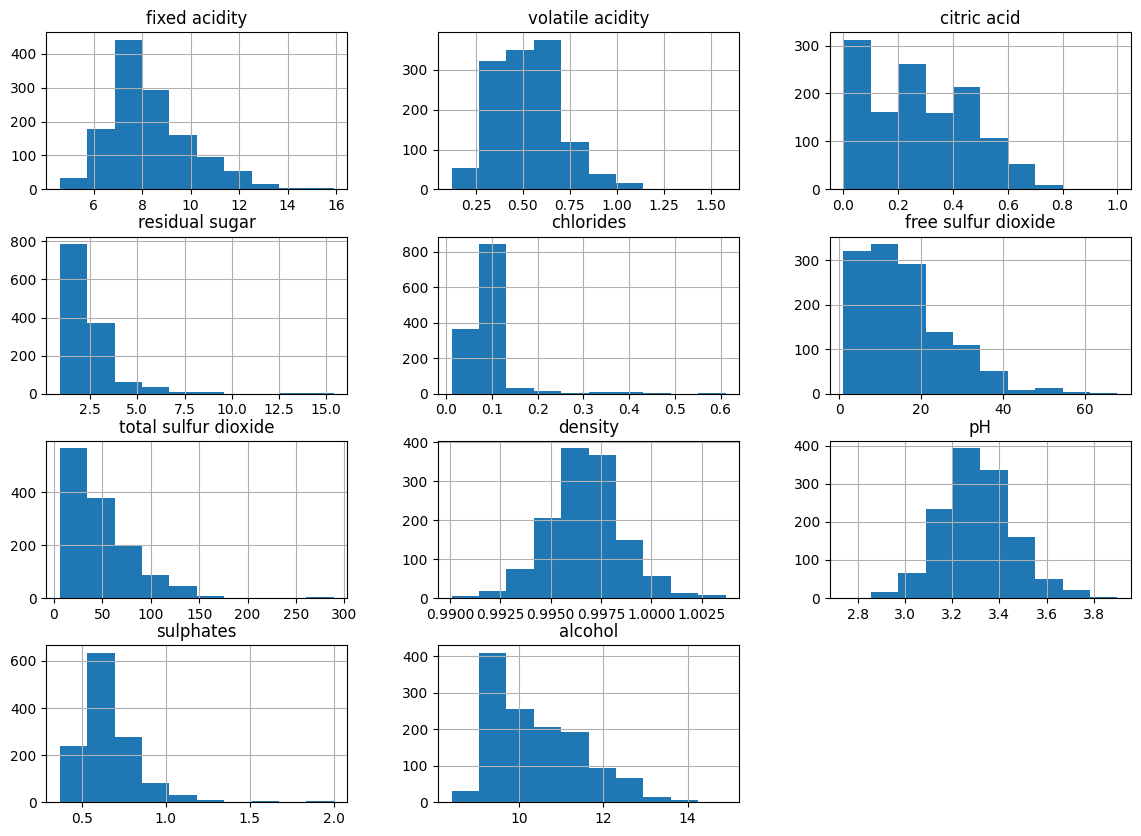

In [50]:
# Another problem: different value ranges (see x-axes)
import matplotlib.pyplot as plt
X_train.hist(figsize=(14, 10))
plt.show()


In [51]:
# Use standard Scaler with column-transformer
ss = StandardScaler()

columns_to_transform = X_train.columns # List of ll coumns in the dataset

ct_standardization = ColumnTransformer(
    [('standard_scaler', ss, X_train.columns)], #ss = standard scaler object
    remainder='passthrough'
)

X_train = ct_standardization.fit_transform(X_train) # we only applied to xtrain dataset, not the test set

In [52]:
X_train.var()
# all names have chaged duo to 'standard_scaler'

standard_scaler__fixed acidity           1.000782
standard_scaler__volatile acidity        1.000782
standard_scaler__citric acid             1.000782
standard_scaler__residual sugar          1.000782
standard_scaler__chlorides               1.000782
standard_scaler__free sulfur dioxide     1.000782
standard_scaler__total sulfur dioxide    1.000782
standard_scaler__density                 1.000782
standard_scaler__pH                      1.000782
standard_scaler__sulphates               1.000782
standard_scaler__alcohol                 1.000782
dtype: float64

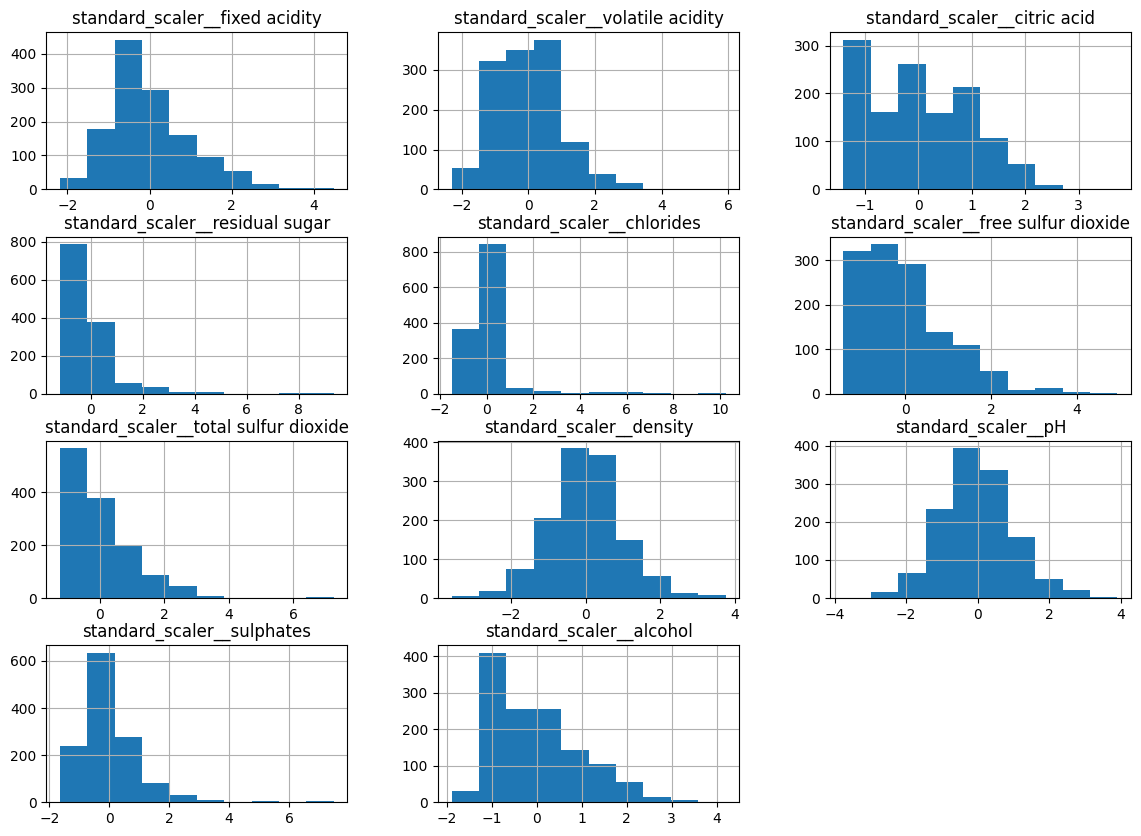

In [53]:
# show distributions 
import matplotlib.pyplot as plt
X_train.hist(figsize=(14, 10))
plt.show()
#values got transformed to std on x axis --> easier to process for machine learning models

## 4.2 Application of different Scalers

- Problem: we still have skewed distributions in some of the variables.
- For those, standardization did not have the desired effect
- Let's create two lists: columns that work well with StandardScaler and columns that doesn not.


In [54]:
# Use PowerTransformer for columns where StandardScaler did not work properly
from sklearn.preprocessing import PowerTransformer # Tries to take an inout (variables with skewed distributions to normalize them to standard distribution)

wine_df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Red_Wine_Quality.csv")

X = wine_df.drop(columns="quality")
y = wine_df["quality"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

ss = StandardScaler()
pt = PowerTransformer()

# columns that show a normal distribution (or very similar) after StandardScaler was applied
columns_StandardScaler = ["density", "pH", 'sulphates', 'alcohol', 'fixed acidity', 'volatile acidity', 'chlorides', 'citric acid']

# for the most obvious skewed distributions, we create another list 
columns_skewed_distribution = ['free sulfur dioxide', 'total sulfur dioxide', 'residual sugar'] 

ct_standardization = ColumnTransformer(
    [('standard_scaler', ss, columns_StandardScaler),
    ('power_transfomer', pt, columns_skewed_distribution)],
    remainder='passthrough'
)

X_train = ct_standardization.fit_transform(X_train)

In [55]:
X_train.var()

standard_scaler__density                  1.000782
standard_scaler__pH                       1.000782
standard_scaler__sulphates                1.000782
standard_scaler__alcohol                  1.000782
standard_scaler__fixed acidity            1.000782
standard_scaler__volatile acidity         1.000782
standard_scaler__chlorides                1.000782
standard_scaler__citric acid              1.000782
power_transfomer__free sulfur dioxide     1.000782
power_transfomer__total sulfur dioxide    1.000782
power_transfomer__residual sugar          1.000782
dtype: float64

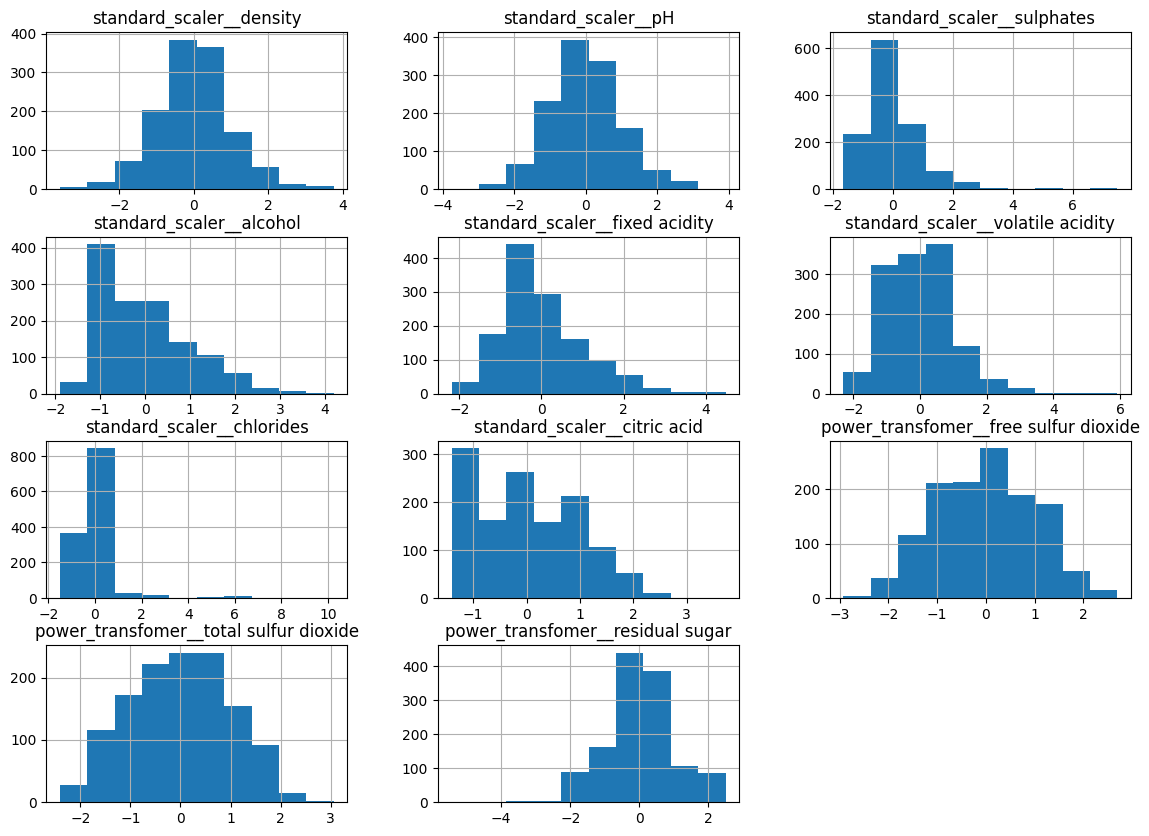

In [56]:
# show distributions 
import matplotlib.pyplot as plt
X_train.hist(figsize=(14, 10))
plt.show()

# 5. Dummy Coding

Encoding of categorical variables

## 5.1 One-Hot encoding of categorical variables

In [57]:
X_train = pd.DataFrame({'shape':['square', 'square', 'oval', 'circle']})
X_train
# No ordinal scale --> simply categories

,shape
0,square
1,square
2,oval
3,circle


In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
# left to right the columns are in alphabetical sequence (circle, oval, square)
ohe = OneHotEncoder(sparse_output=False) # we instantiate it + modification to return value (sparse_output = False)
ohe.fit_transform(X_train) #we apply it to our dataset

,shape_circle,shape_oval,shape_square
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0


In [60]:
ohe.get_feature_names_out()

array(['shape_circle', 'shape_oval', 'shape_square'], dtype=object)

## 5.2 Ordinal encoding for categorical features

In [61]:
X_train = pd.DataFrame({'rating':['very good', 'very bad', 'very good', 'OK', 'good', 'very good','bad']})
X_train

,rating
0,very good
1,very bad
2,very good
3,OK
4,good
5,very good
6,bad


In [62]:
from sklearn.preprocessing import OrdinalEncoder # for ordinal values ordinalEncoder

In [63]:
# Define the order of categories
categories = [['very bad', 'bad', 'OK', 'good', 'very good']]
oe = OrdinalEncoder(categories=categories)
oe.fit_transform(X_train)

,rating
0,4.0
1,0.0
2,4.0
3,2.0
4,3.0
5,4.0
6,1.0


## 5.3 Application to dataset

In [64]:
iris_df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Iris.csv")
iris_df.head()

,Id,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False) #instantiate it

ct_one_hot = ColumnTransformer( 
    [('OneHotEncoder', ohe, ["Species"])],
    remainder='passthrough'
)

ct_one_hot.fit_transform(iris_df)


,OneHotEncoder__Species_Iris-setosa,OneHotEncoder__Species_Iris-versicolor,OneHotEncoder__Species_Iris-virginica,remainder__Id,remainder__Sepal Length (cm),remainder__Sepal Width (cm),remainder__Petal Length (cm),remainder__Petal Width (cm)
0,1.0,0.0,0.0,1,5.1,3.5,1.4,0.2
1,1.0,0.0,0.0,2,4.9,3.0,1.4,0.2
2,1.0,0.0,0.0,3,4.7,3.2,1.3,0.2
3,1.0,0.0,0.0,4,4.6,3.1,1.5,0.2
4,1.0,0.0,0.0,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...,...
145,0.0,0.0,1.0,146,6.7,3.0,5.2,2.3
146,0.0,0.0,1.0,147,6.3,2.5,5.0,1.9
147,0.0,0.0,1.0,148,6.5,3.0,5.2,2.0
148,0.0,0.0,1.0,149,6.2,3.4,5.4,2.3


In [66]:
#The whole steps is like a checkbox for a new dataset 

<a class="anchor" id="chapter_6"></a>

# 6. Feature Selection
Source: https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

Goal: remove unnecessary features from dataset that might create noise




## 6.1 Correlation Matrix

*   Good features correlate highly with the prediction target
*   Good features do not correlate among themselves

In [67]:
# Prediction of quality-levels based wine-features
wine_df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Red_Wine_Quality.csv")
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: >

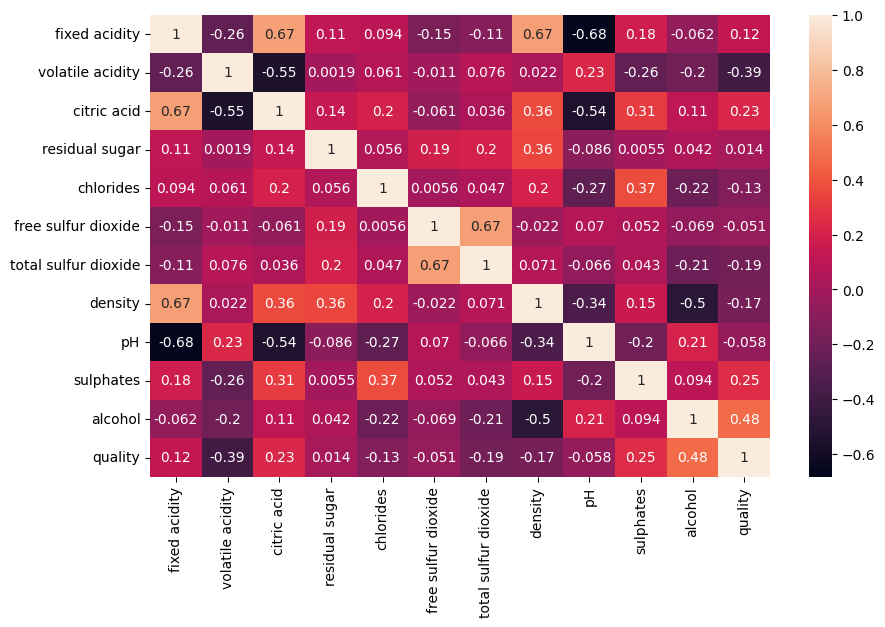

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# correlation matrix
cor = wine_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)


## 6.2 Information Gain
* Information gain calculates the reduction in entropy
* It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.
*   High values indicate a strong predictive power
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html


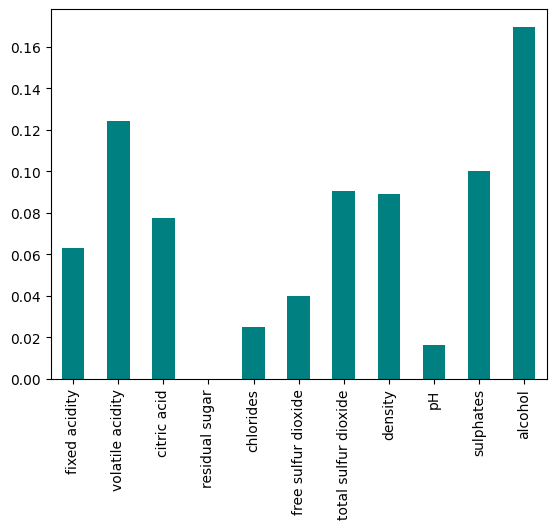

In [69]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

X = wine_df.drop("quality", axis=1)
y = wine_df["quality"]                # we defined our datasets

importances = mutual_info_classif(X, y)
feature_importances = pd.Series(importances, wine_df.columns[0:len(wine_df.columns)-1])
feature_importances.plot(kind="bar", color="teal")
plt.show()
#if u want to use it simply copy the lines and name columns

## 6.3 Automated Methods
Link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html


In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from numpy import array 

iris_df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Iris.csv")


In [71]:
# Create training set and prediction target
X = iris_df.drop("Species", axis=1)
y = iris_df[["Species"]]

# Perform feature selection
# Set k to the number of features you want to identify
select = SelectKBest(score_func=chi2, k=3) # k = to select categories
select.fit_transform(X,y)

# Print feature names
filter = select.get_support() 
features = array(X.columns)

print("All features:")
print(features)
 
print("Selected best 3:")
print(features[filter])


All features:
['Id' 'Sepal Length (cm)' 'Sepal Width (cm)' 'Petal Length (cm)'
 'Petal Width (cm)']
Selected best 3:
['Id' 'Petal Length (cm)' 'Petal Width (cm)']


# 7. Pipelines

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# define classifier (= ML-model)
clf = DecisionTreeClassifier()

# Define dataset
wine_df = pd.read_csv("C:/Users/Vic/Desktop/Data Scienece/Datasets-20231016/Dataset_Red_Wine_Quality.csv")
X = wine_df.drop(columns="quality")
y = wine_df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Add Preprocessing Steps
ss = StandardScaler()
pt = PowerTransformer()
columns_StandardScaler = ["density", "pH", 'sulphates', 'alcohol', 'fixed acidity', 'volatile acidity', 'chlorides', 'citric acid']
columns_skewed_distribution = ['free sulfur dioxide', 'total sulfur dioxide', 'residual sugar']
ct = ColumnTransformer(
    [('standard_scaler', ss, columns_StandardScaler),
    ('power_transfomer', pt, columns_skewed_distribution)],
    remainder='passthrough'
)

# create pipeline
pipe = Pipeline([
    ('preprocessor', ct),
    ('classifier', clf)]
)

In [73]:
pipe #we directly wee what happens within the pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['density', 'pH', 'sulphates',
                                                   'alcohol', 'fixed acidity',
                                                   'volatile acidity',
                                                   'chlorides',
                                                   'citric acid']),
                                                 ('power_transfomer',
                                                  PowerTransformer(),
                                                  ['free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'residual sugar'])])),
                ('classifier', DecisionTreeClassifier())])

In [74]:
pipe.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['density', 'pH', 'sulphates',
                                                   'alcohol', 'fixed acidity',
                                                   'volatile acidity',
                                                   'chlorides',
                                                   'citric acid']),
                                                 ('power_transfomer',
                                                  PowerTransformer(),
                                                  ['free sulfur dioxide',
                                                   'total sulfur dioxide',
                                                   'residual sugar'])])),
                ('classifier', DecisionTreeClassifier())])

In [75]:
y_pred = pipe.predict(X_test)

In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.27      0.26        11
           5       0.74      0.65      0.69       136
           6       0.60      0.61      0.61       128
           7       0.53      0.62      0.57        40
           8       0.08      0.33      0.13         3

    accuracy                           0.61       320
   macro avg       0.37      0.41      0.38       320
weighted avg       0.63      0.61      0.62       320

